All libraries imported

In [1]:
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import pandas as pd
import numpy as np

In [2]:
#Download_root="https://github.com/ageron/handson-ml2/tree/master/"
#we were not able to open the zip file from this url therefore we changed it to given in the pdf
#So basically write the parent URL you want to download the data from various subpages of this URl
#or write the URL directly if you want to download the data from one source
Download_root="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # this is location where our data file would be downloaded, this is just path
HOUSING_URL = Download_root + "datasets/housing/housing.tgz" # this is the exact url where data is present

function to download the data from online source

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH): # we have given default arguments
    os.makedirs(housing_path, exist_ok=True) # now we are creating folder
    tgz_path = os.path.join(housing_path, "housing.tgz") # just creating path
    urllib.request.urlretrieve(housing_url, tgz_path) # here data is being download from URL to mentioned folder
    housing_tgz = tarfile.open(tgz_path) # file is open
    housing_tgz.extractall(path=housing_path) # file is extracted
    housing_tgz.close() # file closed

In [4]:
fetch_housing_data()

Function to load the data

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_file_location=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_file_location)

In [6]:
housing=load_housing_data()
housing.head() #to see 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The info() method is useful to get a quick description of the data, in particular
the total number of rows, each attribute’s type, and the number of nonnull values

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see there are some null values in total_bedrooms attributes as there are 20433 non-null values whereas we can see that there are 20640 entries. 
Another intresting observation is ocean_proximity attribute type is object whereas rest are float64 we can see from head() command the values of attribute ocean_proximity are repetitve so they are categorical

So let's check what categories are there and what is the frequency

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let's see the summary of data

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E661E9D30>,
      dtype=object)

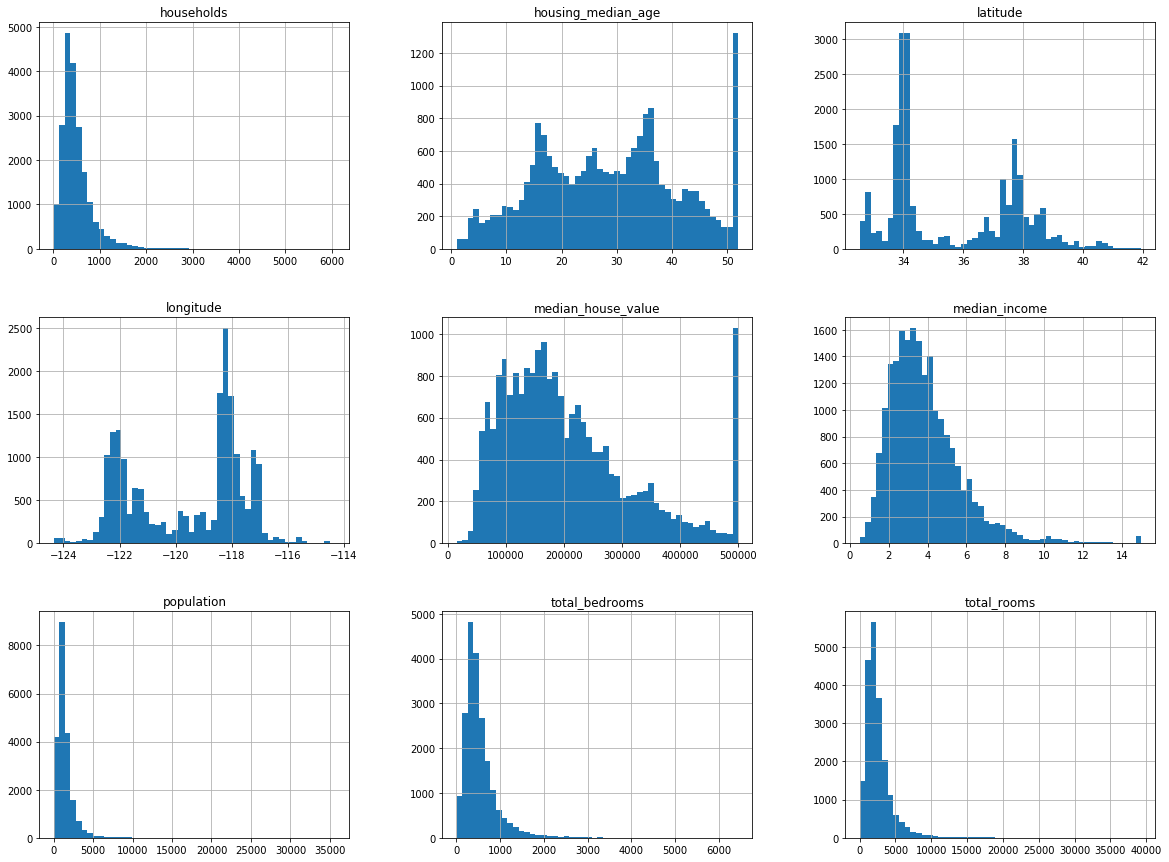

In [10]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15)) 
#figsize tells us the size of graph apparently they are in inches which we are not sure how

median income,median_income and median house value are capped.As our target variable is median house value we need to make sure that whether we want capped output or real output

If we want real output either collect uncapped data or remove those data points.

Then train the model

Let's divide the data set into training and test data set


function to divide Data into training and testing set

In [11]:
'''
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
'''
 

'\ndef split_train_test(data, test_ratio):\n    shuffled_indices = np.random.permutation(len(data))\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled_indices[:test_set_size]\n    train_indices = shuffled_indices[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\n'

This is one way to create split you may uncomment and call the function

but there is another way to do so using sklearn.model library

In [12]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=0)

here we have kept random state =0 first of all it can be kept equal to anything

second we have kept it here so we get the same split everytime we run it 

if we change random_state=1 we get diff results

In [13]:
'''from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
#crc32 is used for hashing with fewer collisions
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
'''


'from zlib import crc32\ndef test_set_check(identifier, test_ratio):\n    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32\n#crc32 is used for hashing with fewer collisions\ndef split_train_test_by_id(data, test_ratio, id_column):\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))\n    return data.loc[~in_test_set], data.loc[in_test_set]\n'

This is used when dataset is updated and we want to keep data set consistent this will ensure that data point which was earlier in training set will now not be in test data set. we use unique columns to calculate hash value and decide the dataset accordingly

We are now doing stratified sampling

by interacting with expert we became aware that median_income is important feature so we have decided to create various categories of attribute 

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

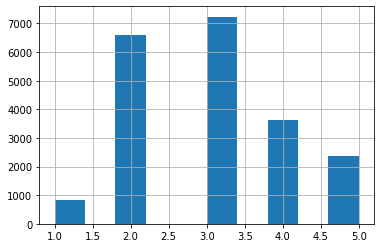

In [15]:
housing["income_cat"].hist()

In [16]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing,
housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

split function is used to Generate indices to split data into training and test set.

In [18]:
split.get_n_splits(housing,housing["income_cat"])

1

get_n_splits is used to Return the number of splitting iterations in the cross-validator

In [19]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

So you can clearly see that we have almost achieved the ratio in testset as it was in housing data

In [20]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

now the work of income_cat attribute is over we shall remove it

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

drop function is used to remove the column income_cat

 We are creating the copy of training set so that we can play with the copy and not harm the original

In [22]:
housing_temp=strat_train_set.copy()

## Visualisation of data

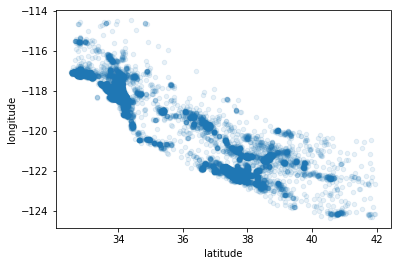

In [23]:
housing_temp.plot(kind="scatter",x="latitude",y="longitude",alpha=.1)
#alpha keyword is used to play with transparency of graph

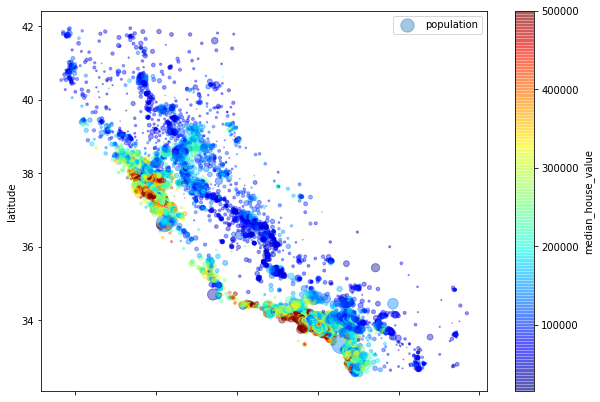

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):

## Correlation Matrix

In [25]:
correlation_matrix=housing_temp.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924903,-0.108097,0.041547,0.065183,0.096933,0.051827,-0.013645,-0.043236
latitude,-0.924903,1.000000,0.010784,-0.034359,-0.064436,-0.106834,-0.069613,-0.081262,-0.145570
housing_median_age,-0.108097,0.010784,1.000000,-0.359036,-0.317509,-0.293215,-0.300756,-0.113458,0.107144
total_rooms,0.041547,-0.034359,-0.359036,1.000000,0.929552,0.853612,0.918026,0.196382,0.137469
total_bedrooms,0.065183,-0.064436,-0.317509,0.929552,1.000000,0.874315,0.980162,-0.009282,0.053544
population,0.096933,-0.106834,-0.293215,0.853612,0.874315,1.000000,0.903795,0.003431,-0.023797
households,0.051827,-0.069613,-0.300756,0.918026,0.980162,0.903795,1.000000,0.011840,0.069177
median_income,-0.013645,-0.081262,-0.113458,0.196382,-0.009282,0.003431,0.011840,1.000000,0.688883
median_house_value,-0.043236,-0.145570,0.107144,0.137469,0.053544,-0.023797,0.069177,0.688883,1.000000


In [26]:
correlation_matrix["median_house_value"].sort_values(ascending=True)

latitude             -0.145570
longitude            -0.043236
population           -0.023797
total_bedrooms        0.053544
households            0.069177
housing_median_age    0.107144
total_rooms           0.137469
median_income         0.688883
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E6738B588>,
      dtype=object)

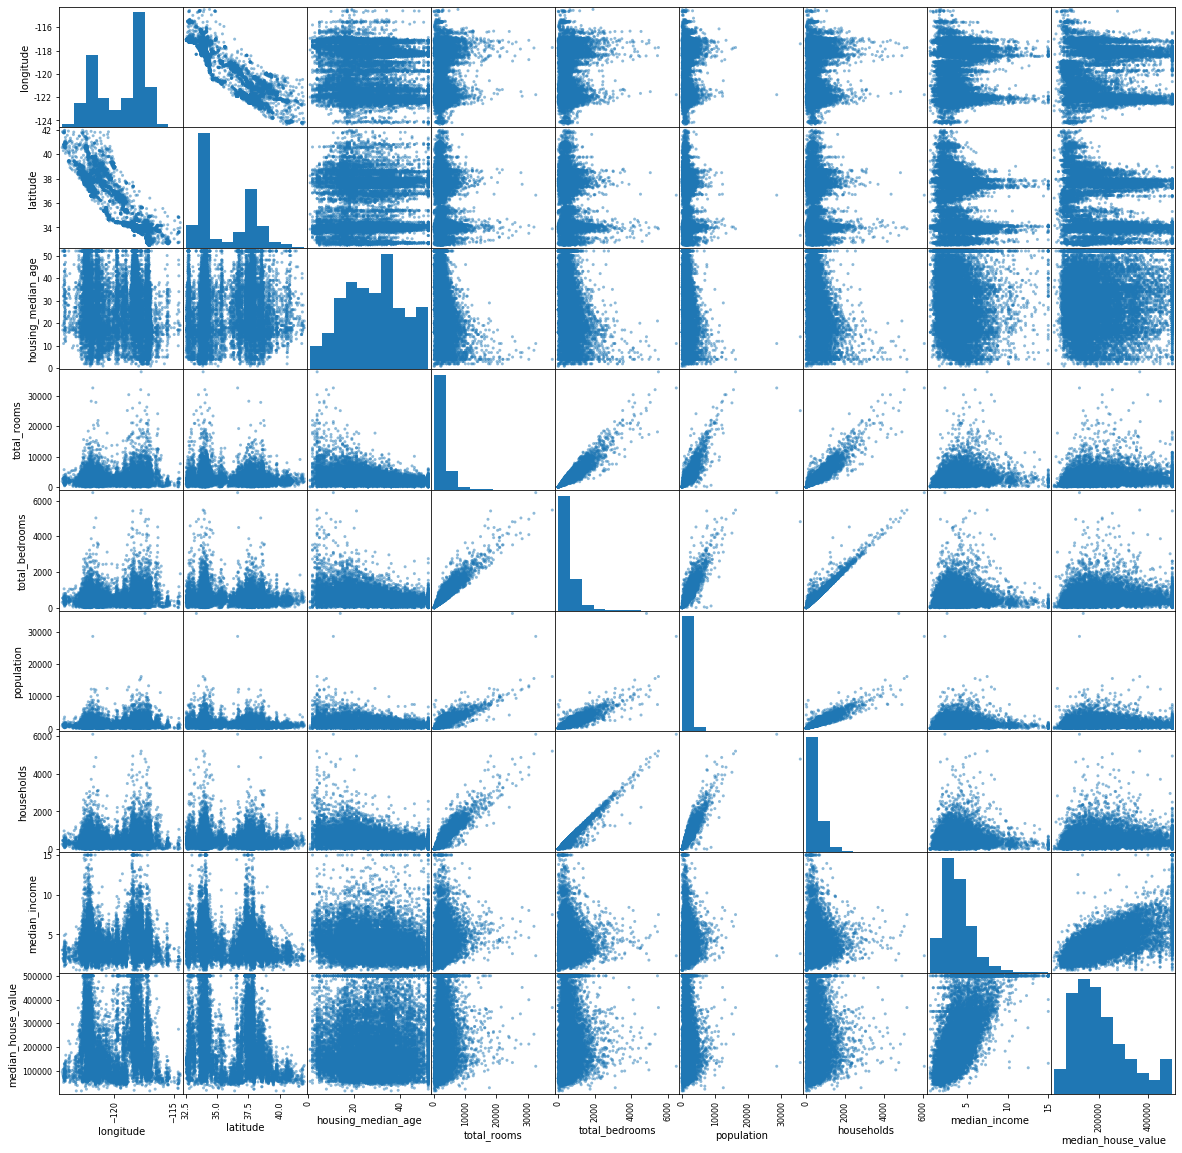

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_temp,figsize=(20,20))

The most promising attribute to predict the median house value is the median
income

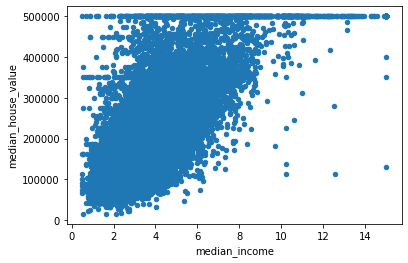

In [28]:
housing_temp.plot(kind="scatter",x="median_income",y="median_house_value")

Now let's do some feature extraction

In [29]:
housing_temp["rooms_per_household"]=housing_temp["total_rooms"]/housing_temp["households"]

In [30]:
housing_temp["bedrooms_per_room"]=housing_temp["total_bedrooms"]/housing_temp["total_rooms"]

In [31]:
housing_temp["population_per_household"]=housing_temp["population"]/housing["households"]

In [32]:
corr_matrix=housing_temp.corr()

In [33]:
corr_matrix["median_house_value"].sort_values()

bedrooms_per_room          -0.255870
latitude                   -0.145570
longitude                  -0.043236
population_per_household   -0.026888
population                 -0.023797
total_bedrooms              0.053544
households                  0.069177
housing_median_age          0.107144
total_rooms                 0.137469
rooms_per_household         0.157620
median_income               0.688883
median_house_value          1.000000
Name: median_house_value, dtype: float64

bedrooms_per_room is much more significant than total_bedrooms and total_rooms

rooms_per_household is more significant than total_rooms and households

# Prepare the Data for Machine Learning Algorithms

 separation of output from training data

In [34]:
labeled_data=housing_temp["median_house_value"].copy()

In [35]:
labeled_data

10275    142800.0
20601     57900.0
20138    181300.0
18028    245300.0
16289     73900.0
           ...   
6358     136000.0
618      245400.0
3407     197300.0
17590    340000.0
4303     253300.0
Name: median_house_value, Length: 16512, dtype: float64

In [36]:
housing_temp.drop("median_house_value",axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856,<1H OCEAN,4.502947,0.231675,4.316306
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694,INLAND,5.022727,0.233032,4.693182
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991,<1H OCEAN,4.809339,0.228155,4.198444
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750,<1H OCEAN,6.235294,0.164420,2.789916
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694,INLAND,4.594444,0.231560,4.445833
...,...,...,...,...,...,...,...,...,...,...,...,...
6358,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094,INLAND,4.036474,0.262048,2.744681
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355,NEAR BAY,5.105978,0.217935,2.137228
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833,<1H OCEAN,4.938356,0.197642,2.941781
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287,<1H OCEAN,5.172881,0.192333,2.327119


### Handling missing data

There are 3 strategies to deal with missing data , apply any one
- Get rid of data point
- remove the attribute
- fill the data with value(zero, median,mean)

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

We want to replace the values with median and we can't calculate median of categorical variable so we create a dataframe just having numbers

In [38]:
housing_num=housing_temp.drop("ocean_proximity",axis=1)

In [39]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [41]:
X=imputer.transform(housing_num)
X

array([[-117.87      ,   33.86      ,   28.        , ...,    4.50294695,
           0.23167539,    4.31630648],
       [-121.57      ,   39.13      ,   30.        , ...,    5.02272727,
           0.23303167,    4.69318182],
       [-119.05      ,   34.4       ,   50.        , ...,    4.80933852,
           0.22815534,    4.19844358],
       ...,
       [-118.3       ,   34.25      ,   44.        , ...,    4.93835616,
           0.19764216,    2.94178082],
       [-121.91      ,   37.31      ,   46.        , ...,    5.17288136,
           0.1923329 ,    2.32711864],
       [-118.3       ,   34.09      ,   29.        , ...,    2.9446461 ,
           0.36671803,    3.54446461]])

Conversion back to dataframe

In [43]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [44]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856,142800.0,4.502947,0.231675,4.316306
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694,57900.0,5.022727,0.233032,4.693182
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991,181300.0,4.809339,0.228155,4.198444
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750,245300.0,6.235294,0.164420,2.789916
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694,73900.0,4.594444,0.231560,4.445833
...,...,...,...,...,...,...,...,...,...,...,...,...
6358,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094,136000.0,4.036474,0.262048,2.744681
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355,245400.0,5.105978,0.217935,2.137228
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833,197300.0,4.938356,0.197642,2.941781
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287,340000.0,5.172881,0.192333,2.327119


In [65]:
ocean_proximity=housing_temp[["ocean_proximity"]]

We have to put two sets of square brackets otherwise we were getting series and were not able to apply one hot encoding

conversion of Categorical Variables with Numerical Variables 

Here we have done one hot encoding as there is not ordinal relation between categorical variables

If there is ordinal relation like rating we will use below method

In [64]:
'''from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_ocean_proximity=ordinal_encoder.fit_transform(ocean_proximity)
encoded_ocean_proximity[:10]
'''

'from sklearn.preprocessing import OrdinalEncoder\nordinal_encoder = OrdinalEncoder()\nencoded_ocean_proximity=ordinal_encoder.fit_transform(ocean_proximity)\nencoded_ocean_proximity[:10]\n'

In [66]:
ocean_proximity

,ocean_proximity
10275,<1H OCEAN
20601,INLAND
20138,<1H OCEAN
18028,<1H OCEAN
16289,INLAND
...,...
6358,INLAND
618,NEAR BAY
3407,<1H OCEAN
17590,<1H OCEAN


In [67]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
ocean_proximity_hot_enc=one_hot_encoder.fit_transform(ocean_proximity)

In [68]:
ocean_proximity_hot_enc

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

This is stored in CSR format to save up space, if you want to save it ocean_proximity_hot_enc.toarray() command to see the  sparse array

To see the categories which have been transformed into set of dummy variables use the onehotencoder's 
object.categories_

In [71]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature scaling

In [72]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_tr=std_scaler.fit_transform(housing_tr)

Like we have so many transformations we can create pipeline using

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

we can also include custom Transformations inside the pipeline

To deal with categorical and numerical variables using one tranfomers

We use columns transformer using these commands

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

num_pipeline is the pipeline defined in previous blocks

So we have housing_num_tr as training set and labeled_data as labelled data and there expected value so let's apply linear regression algorithm to the data

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_num_tr, labeled_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We are evaluating the model on training set

In [82]:
some_data=housing_num_tr[:5]
some_data_label=labeled_data[:5]
lm_predictions=lin_reg.predict(some_data)

In [84]:
lm_predictions

array([142800.,  57900., 181300., 245300.,  73900.])

In [85]:
some_data_label

10275    142800.0
20601     57900.0
20138    181300.0
18028    245300.0
16289     73900.0
Name: median_house_value, dtype: float64

In [83]:
from sklearn.metrics import mean_squared_error
lm_mse=mean_squared_error(some_data_label,lm_predictions)
lm_rmse=np.sqrt(lm_mse)
lm_rmse

8.435091438115015e-11

Probably overfitting

Now we have decided use DecisionTree

Apparantenly geron model was showing high RMSE probably underfitting so he decided to use stronger model but we don't know 
what to do in case of overfitting so we decided to explore what geron did

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_num_tr, labeled_data)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

We are evaluating the model on training set

In [75]:
model_predictions=tree_reg.predict(housing_num_tr)

In [79]:
from sklearn.metrics import mean_squared_error
tree_mse=mean_squared_error(labeled_data,model_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

Zero error so probably Overfitting

## Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg,housing_num_tr,labeled_data,scoring="neg_mean_squared_error",cv=10)
rmse_tree_scores=np.sqrt(-tree_scores)

In [91]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean of Scores",scores.mean())
    print("Standard Deviation of Scores",scores.std())

In [92]:
display_scores(rmse_tree_scores)

Scores [115.59667558 120.28014112  86.76848761 123.52092837  95.79278059
 145.59970181 293.90641885 102.00889499  92.67542339 113.02245935]
Mean of Scores 128.91719116696999
Standard Deviation of Scores 57.39756985718391


Again Our model is performing better than Geron, Lol I don't have clue how my model is better than Geron's model

In [94]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(housing_num_tr, labeled_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [95]:
rf_predictions=forest_reg.predict(housing_num_tr)

In [96]:
from sklearn.metrics import mean_squared_error
rf_mse=mean_squared_error(rf_predictions,labeled_data)

In [97]:
rf_rmse=np.sqrt(rf_mse)
rf_rmse

29.070727277271654

Cross Validation in Random Forest

In [99]:
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(forest_reg,housing_num_tr,labeled_data,scoring="neg_mean_squared_error",cv=10)
rf_tree_scores=np.sqrt(-rf_scores)

In [101]:
display_scores(rf_tree_scores)

Scores [147.19657161  95.26667643  42.73912668  69.55876691  49.41442517
  85.90297314  86.18086269  70.35078241  52.51170341  47.43594617]
Mean of Scores 74.65578346330824
Standard Deviation of Scores 29.79579360364514


Support Vector Regression

In [102]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_num_tr,labeled_data)
housing_predictions = svm_reg.predict(housing_num_tr)
svm_mse = mean_squared_error(labeled_data, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

98798.53223757399

## Fine Tuning the model

Grid Search for various hyperparmeters 

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=0)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_num_tr,labeled_data)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
   

In [104]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since we got max_features and n_estimators as 8 and 30 respectively, but we kept these as the max values so let's try with more wide hyperparameters

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 20 (4×5) combinations of hyperparameters
    {'n_estimators': [3, 10, 30,80], 'max_features': [2, 4, 6, 8,10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=0)
# train across 5 folds, that's a total of (20+6)*5=130 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_num_tr,labeled_data)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8, 10],

In [108]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

now grid search shows best max_features should be 10 and n_estimators must be 80, so if we try now more values maybe we get better results but let's try it next time.

In [109]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

26513.197161824723 {'max_features': 2, 'n_estimators': 3}
19236.094346605547 {'max_features': 2, 'n_estimators': 10}
17365.393161864235 {'max_features': 2, 'n_estimators': 30}
16043.308545811027 {'max_features': 2, 'n_estimators': 80}
10198.266503585133 {'max_features': 4, 'n_estimators': 3}
8296.588498794421 {'max_features': 4, 'n_estimators': 10}
5886.307007871544 {'max_features': 4, 'n_estimators': 30}
5663.939713026025 {'max_features': 4, 'n_estimators': 80}
4918.737717390928 {'max_features': 6, 'n_estimators': 3}
4251.464999520961 {'max_features': 6, 'n_estimators': 10}
2375.701974934016 {'max_features': 6, 'n_estimators': 30}
1985.9476086150175 {'max_features': 6, 'n_estimators': 80}
2500.2217663092356 {'max_features': 8, 'n_estimators': 3}
1531.5312856663045 {'max_features': 8, 'n_estimators': 10}
922.7521813165555 {'max_features': 8, 'n_estimators': 30}
685.7257875957177 {'max_features': 8, 'n_estimators': 80}
830.4164893543557 {'max_features': 10, 'n_estimators': 3}
467.346276

In [110]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178759,0.007563,0.008282,0.002062,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-5.596463e+08,-7.634646e+08,...,-7.029496e+08,1.113737e+08,26,-2.060917e+08,-2.604730e+08,-2.128263e+08,-2.321017e+08,-2.941120e+08,-2.411209e+08,3.253164e+07
1,0.617241,0.046635,0.019404,0.002269,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.209467e+08,-3.655151e+08,...,-3.700273e+08,6.236972e+07,23,-8.158242e+07,-9.558187e+07,-9.063757e+07,-8.580450e+07,-1.085326e+08,-9.242779e+07,9.316736e+06
2,1.826929,0.074295,0.056157,0.001761,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.854704e+08,-2.669188e+08,...,-3.015569e+08,4.319369e+07,21,-5.113965e+07,-5.103802e+07,-5.523338e+07,-5.611717e+07,-6.610579e+07,-5.592680e+07,5.494466e+06
3,4.855118,0.172274,0.148659,0.011039,2,80,NaN,"{'max_features': 2, 'n_estimators': 80}",-2.498577e+08,-2.508823e+08,...,-2.573877e+08,1.588940e+07,20,-3.580722e+07,-4.025016e+07,-4.178360e+07,-4.168935e+07,-4.359346e+07,-4.062476e+07,2.632051e+06
4,0.285756,0.007976,0.006710,0.001774,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-1.176952e+08,-8.783294e+07,...,-1.040046e+08,1.724876e+07,18,-3.853928e+07,-3.378227e+07,-5.453095e+07,-3.086581e+07,-3.326157e+07,-3.819598e+07,8.538261e+06
5,0.952791,0.053905,0.017220,0.001554,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-6.927160e+07,-5.773693e+07,...,-6.883338e+07,1.041657e+07,16,-1.789479e+07,-1.916922e+07,-1.989723e+07,-2.003349e+07,-2.312240e+07,-2.002343e+07,1.725134e+06
6,2.847484,0.055061,0.052823,0.003242,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-3.516385e+07,-3.402271e+07,...,-3.464861e+07,1.926841e+06,14,-7.126385e+06,-8.184643e+06,-8.946475e+06,-7.237461e+06,-8.557771e+06,-8.010547e+06,7.190450e+05
7,7.635499,0.161201,0.140158,0.009332,4,80,NaN,"{'max_features': 4, 'n_estimators': 80}",-3.568790e+07,-3.257715e+07,...,-3.208021e+07,3.191400e+06,13,-5.347298e+06,-6.129870e+06,-5.670929e+06,-5.097514e+06,-5.859946e+06,-5.621112e+06,3.653729e+05
8,0.379852,0.022410,0.007523,0.001867,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.849490e+07,-2.557699e+07,...,-2.419398e+07,1.261232e+07,12,-8.433965e+06,-9.901479e+06,-3.123909e+06,-1.509383e+07,-4.149327e+06,-8.140502e+06,4.304222e+06
9,1.264241,0.041860,0.018466,0.002005,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-1.804606e+07,-1.624119e+07,...,-1.807495e+07,3.208757e+06,11,-4.812882e+06,-6.529614e+06,-6.917923e+06,-5.831358e+06,-4.025707e+06,-5.623497e+06,1.072364e+06


Random Search for hyperparmeters, preferred when hyperparmeter space is large

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=12),
    }

forest_reg = RandomForestRegressor(random_state=0)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=0)
rnd_search.fit(housing_num_tr,labeled_data)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [112]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1666.5277348605346 {'max_features': 6, 'n_estimators': 193}
5126.47200845275 {'max_features': 4, 'n_estimators': 196}
1531.5312856663045 {'max_features': 8, 'n_estimators': 10}
6353.749144651766 {'max_features': 4, 'n_estimators': 22}
9331.881675461813 {'max_features': 3, 'n_estimators': 37}
719.6813994860063 {'max_features': 8, 'n_estimators': 71}
464.51010200751546 {'max_features': 9, 'n_estimators': 89}
144.7640919520419 {'max_features': 11, 'n_estimators': 194}
1442.854859895994 {'max_features': 7, 'n_estimators': 40}
606.0809493737969 {'max_features': 8, 'n_estimators': 175}


In [113]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.92162088e-04, 1.23112543e-03, 3.77523581e-05, 2.17304512e-05,
       1.46268561e-05, 2.29191568e-05, 2.36792127e-05, 6.15020743e-02,
       9.33536006e-01, 1.20728612e-04, 2.20275012e-03, 9.94445305e-04])

This shows the importance of features

Evaluation of model on Test Set


Now we should have created a full pipeline but we didn't did that so I am afraid we won't continue from here